In [343]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [344]:
pd.set_option('display.max_columns', None)

In [375]:
df_accounts = pd.read_csv('classified_twitter_accounts.csv')
df_accounts.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,lang,default_profile,default_profile_image,geo_enabled,protected,verified,classification,dataset,screen_name_total_len,screen_name_num_len,name_total_len,name_num_len,is_url_null,is_location_null,profile_banner_url_null,profile_image_url_null,description_null
0,1502026416,TASUKU HAYAKAWA,0918Bask,2177,208,332,265,1,ja,False,False,True,False,False,human,genuine,8,4,15,0,True,False,False,False,False
1,2492782375,ro_or,1120Roll,2660,330,485,3972,5,ja,True,False,True,False,False,human,genuine,8,4,5,0,True,False,False,False,False
2,293212315,bearclaw,14KBBrown,1254,166,177,1185,0,en,False,False,False,False,False,human,genuine,9,2,8,0,True,True,False,False,False
3,191839658,pocahontas farida,wadespeters,202968,2248,981,60304,101,en,False,False,True,False,False,human,genuine,11,0,17,0,False,False,False,False,False
4,3020965143,Ms Kathy,191a5bd05da04dc,82,21,79,5,0,en,True,False,False,False,False,human,genuine,15,8,8,0,True,False,True,False,False


In [377]:
df_accounts.shape

(14368, 25)

In [378]:
# DROP VARIAVEIS ALTA CARDINALIDADE
df_accounts.drop(['id','name', 'screen_name'], inplace=True, axis=1)

# DROP VARIAVEIS CONSTRUIDAS
construidas = [
'screen_name_total_len',  
'screen_name_num_len',       
'name_total_len',            
'name_num_len',              
'is_url_null',               
'is_location_null',          
'profile_banner_url_null',   
'profile_image_url_null',    
'description_null'] 


df_accounts.drop(construidas, inplace=True, axis=1) 

In [379]:
df_accounts.shape

(14368, 13)

In [380]:
df_accounts.dtypes

statuses_count            int64
followers_count           int64
friends_count             int64
favourites_count          int64
listed_count              int64
lang                     object
default_profile            bool
default_profile_image      bool
geo_enabled                bool
protected                  bool
verified                   bool
classification           object
dataset                  object
dtype: object

In [349]:
# CHECAR SE HA MISSING
df_accounts.isnull().sum()

statuses_count           0
followers_count          0
friends_count            0
favourites_count         0
listed_count             0
lang                     0
default_profile          0
default_profile_image    0
geo_enabled              0
protected                0
verified                 0
classification           0
dataset                  0
dtype: int64

In [350]:
# Checar variaveis quantitativas
df_accounts.describe()

,statuses_count,followers_count,friends_count,favourites_count,listed_count
count,14368.000000,1.436800e+04,14368.000000,14368.000000,14368.000000
mean,5063.190910,8.682774e+02,589.318834,1145.288280,11.173998
std,17493.409898,2.688472e+04,2665.832959,6036.894173,266.966297
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,31.000000,6.000000e+00,42.000000,0.000000,0.000000
50%,63.000000,2.500000e+01,250.000000,0.000000,0.000000
75%,1365.250000,3.320000e+02,538.000000,9.000000,3.000000
max,399555.000000,2.991573e+06,211890.000000,313954.000000,24348.000000


Não há missing values nem valores fora da distribuição esperada

In [351]:
quanti_vars = df_accounts.describe().columns

In [352]:
# converter variaveis boolean para categorica
bool_vars = df_accounts.select_dtypes('bool').columns
df_accounts[bool_vars] = df_accounts[bool_vars].astype('object')

In [353]:
cat_vars = df_accounts.select_dtypes('object').columns

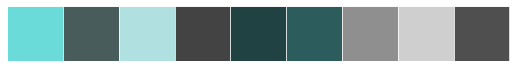

In [354]:
colors = ['#6ADBD9','#485C5B','#B0E1E0', '#434343','#204242','#2C5C5B', '#8F8F8F', '#CFCFCF','#4F4F4F']


sns.set_palette(colors)


current_palette = sns.color_palette()
sns.palplot(current_palette)

# Análsie Univariada

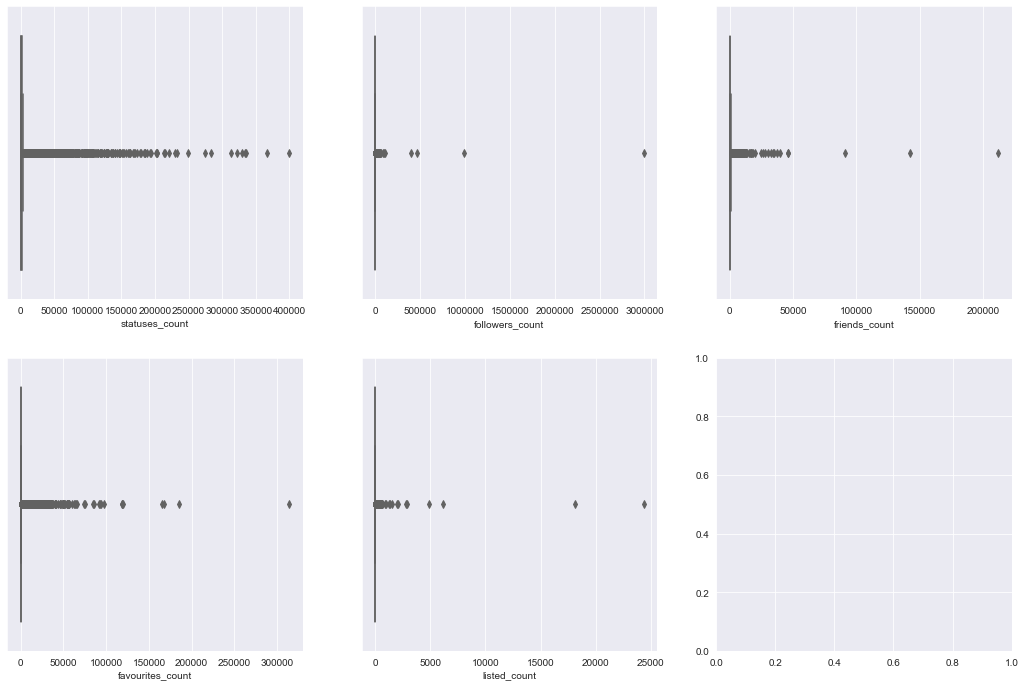

In [355]:
fig, axs = plt.subplots(ncols=3, figsize=(18,10), nrows=2, )
plt.subplots_adjust(bottom=0.005, top = 0.9)

sns.boxplot(df_accounts.statuses_count,           ax=axs[0,0])
sns.boxplot(df_accounts.followers_count,          ax=axs[0,1])
sns.boxplot(df_accounts.friends_count,            ax=axs[0,2])
sns.boxplot(df_accounts.favourites_count,         ax=axs[1,0])
sns.boxplot(df_accounts.listed_count,             ax=axs[1,1])
# sns.boxplot(df_accounts.screen_name_total_len,    ax=axs[1,2])
# sns.boxplot(df_accounts.screen_name_num_len,      ax=axs[2,0])
# sns.boxplot(df_accounts.name_total_len,           ax=axs[2,1])
# sns.boxplot(df_accounts.name_num_len,             ax=axs[2,2])

Todas as variávei continuas possuem outliers

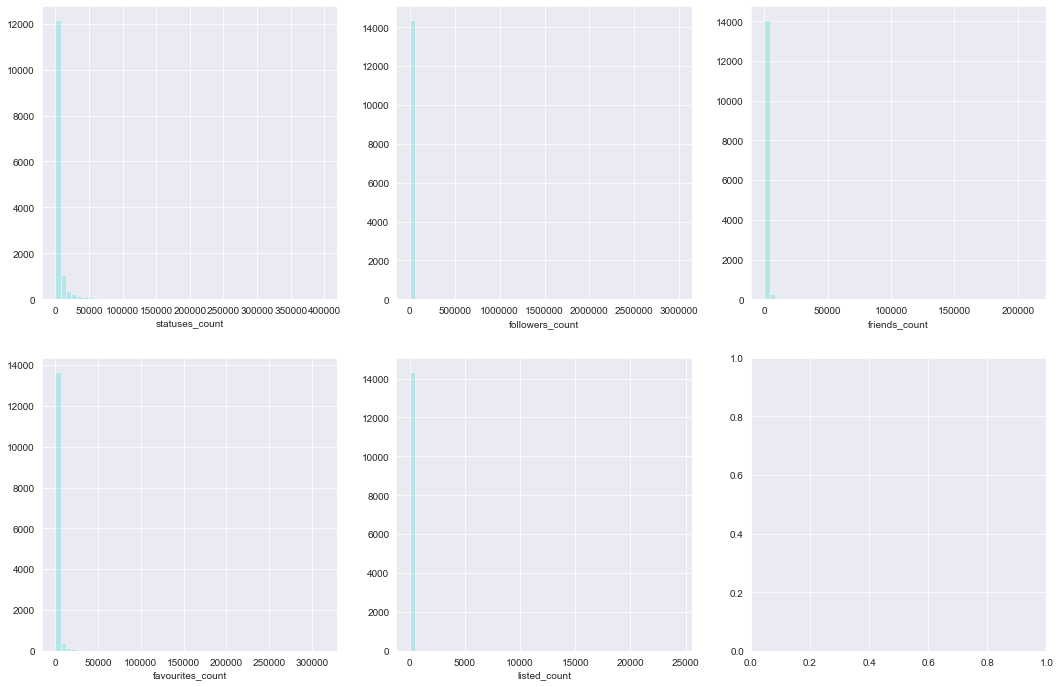

In [356]:
fig, axs = plt.subplots(ncols=3, figsize=(18,10), nrows=2, )
plt.subplots_adjust(bottom=0.005, top = 0.9)

sns.distplot(df_accounts.statuses_count,           ax=axs[0,0], kde=False)
sns.distplot(df_accounts.followers_count,          ax=axs[0,1], kde=False)
sns.distplot(df_accounts.friends_count,            ax=axs[0,2], kde=False)
sns.distplot(df_accounts.favourites_count,         ax=axs[1,0], kde=False)
sns.distplot(df_accounts.listed_count,             ax=axs[1,1], kde=False)
# sns.distplot(df_accounts.screen_name_total_len,    ax=axs[1,2], kde=False)
# sns.distplot(df_accounts.screen_name_num_len,      ax=axs[2,0], kde=False)
# sns.distplot(df_accounts.name_total_len,           ax=axs[2,1], kde=False)
# sns.distplot(df_accounts.name_num_len,             ax=axs[2,2], kde=False)

Os dados não possuem distribuição normal

In [357]:
df_accounts.dtypes

statuses_count            int64
followers_count           int64
friends_count             int64
favourites_count          int64
listed_count              int64
lang                     object
default_profile          object
default_profile_image    object
geo_enabled              object
protected                object
verified                 object
classification           object
dataset                  object
dtype: object

In [358]:
df_accounts.classification.value_counts(normalize=True)

bot      0.758213
human    0.241787
Name: classification, dtype: float64

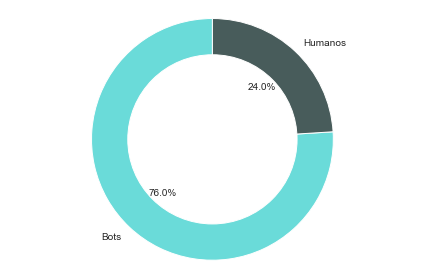

In [359]:
import matplotlib.pyplot as plt
# Pie chart
labels = ['Bots', 'Humanos']
sizes = [76, 24]
#colors
colors = ['#6ADBD9','#485C5B']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

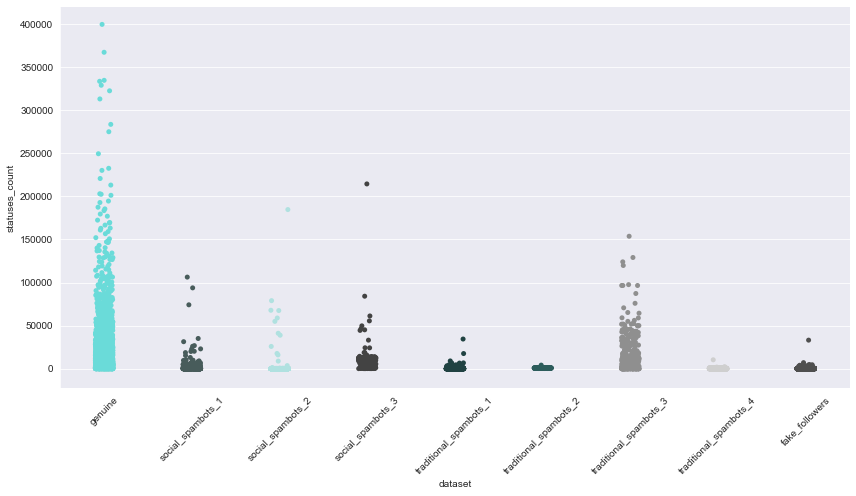

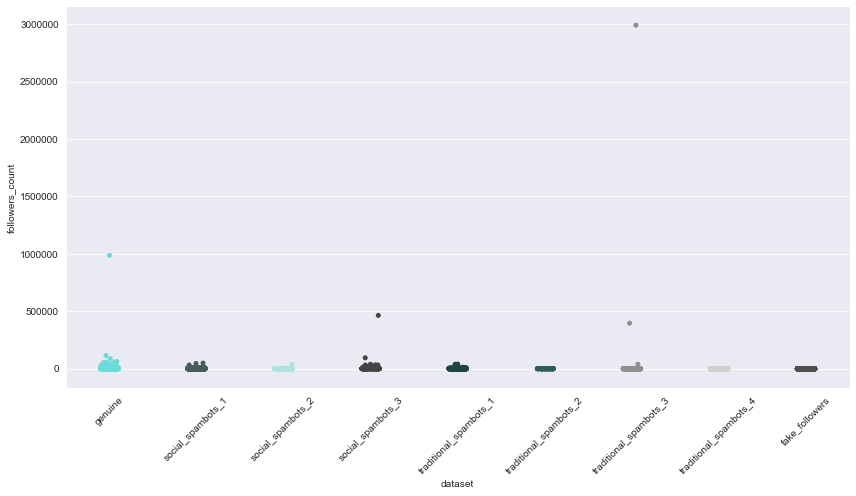

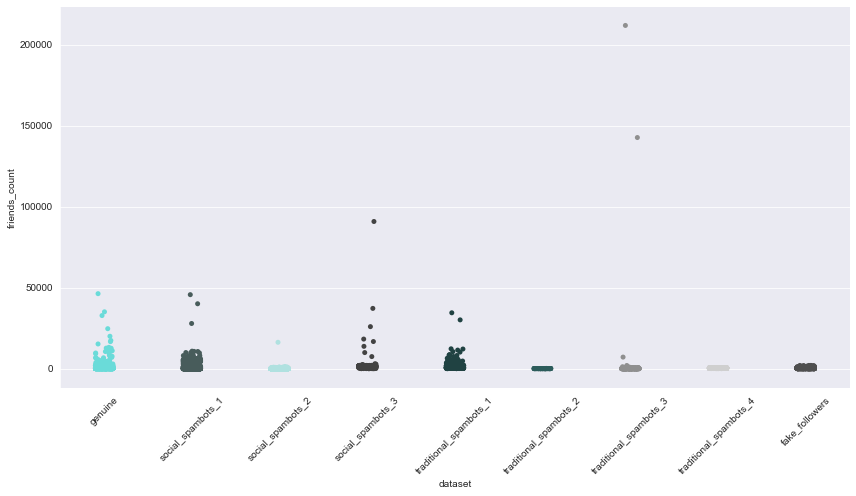

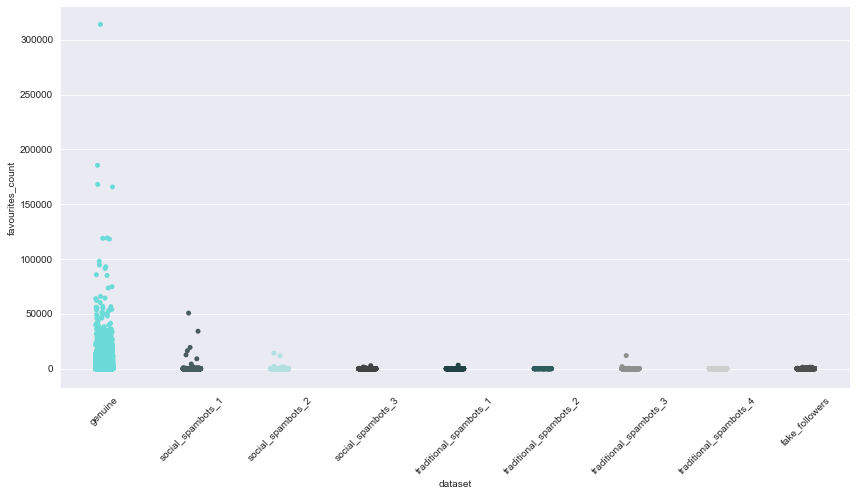

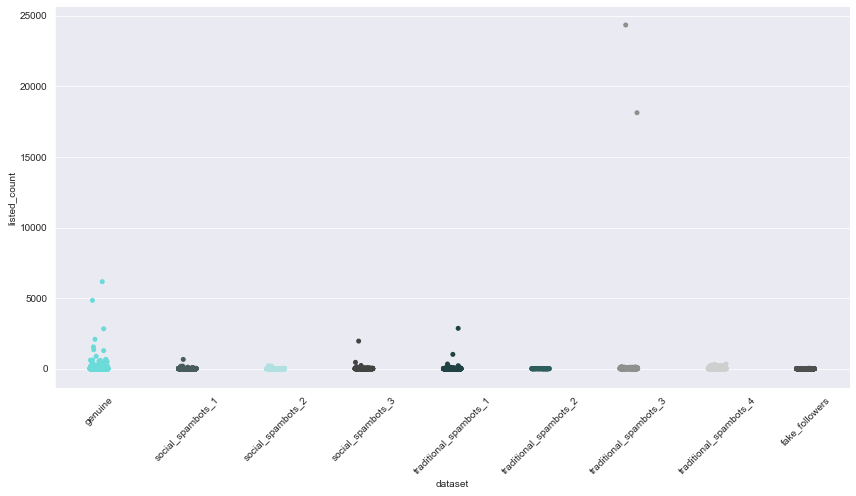

In [360]:
sns.set_style("darkgrid")
for var in quanti_vars:
    #fig, axs = plt.subplots(ncols=1, figsize=(15,8), nrows=1)
    # plt.subplots_adjust(bottom=0.1, top = 0.9)
    chart = sns.catplot(data=df_accounts, x='dataset', y=var, height=6, aspect=2)
    #chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right');
    plt.xticks(rotation=45)
    plt.show()



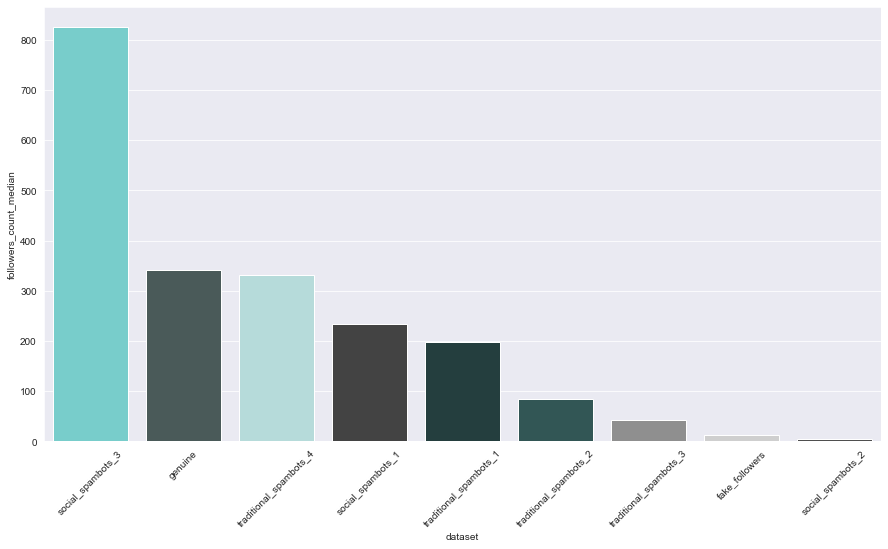

In [361]:
data = df_accounts.groupby('dataset').agg(followers_count_median=('followers_count', 'median')).reset_index().sort_values(by ='followers_count_median' , ascending=False)

fig, axs = plt.subplots(ncols=1, figsize=(15,8), nrows=1)
sns.set_style("darkgrid")
chart = sns.barplot(data=data, x='dataset', y='followers_count_median')
plt.xticks(rotation=45);

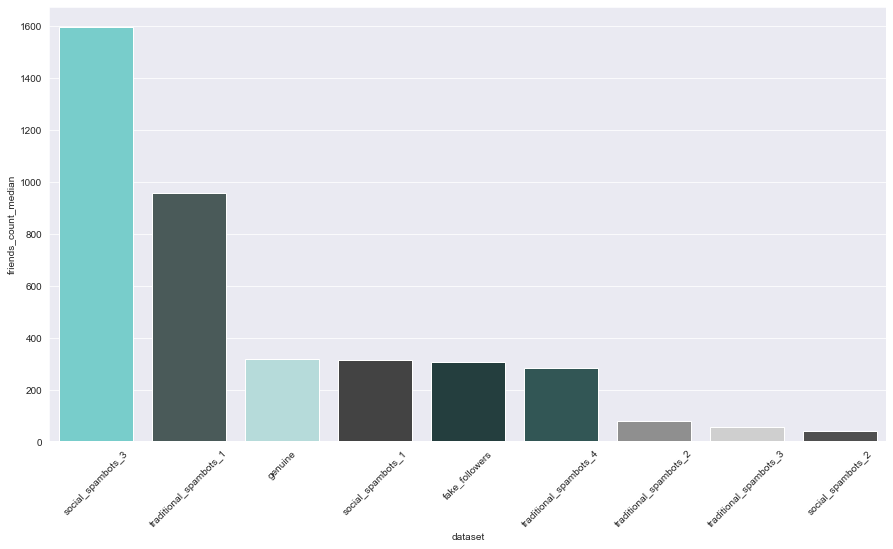

In [362]:
data = df_accounts.groupby('dataset').agg(friends_count_median=('friends_count', 'median')).reset_index().sort_values(by ='friends_count_median' , ascending=False)

fig, axs = plt.subplots(ncols=1, figsize=(15,8), nrows=1)
sns.set_style("darkgrid")
chart = sns.barplot(data=data, x='dataset', y='friends_count_median')
plt.xticks(rotation=45);

# Análise Bivariada

In [363]:
cat_vars

Index(['lang', 'default_profile', 'default_profile_image', 'geo_enabled',
       'protected', 'verified', 'classification', 'dataset'],
      dtype='object')

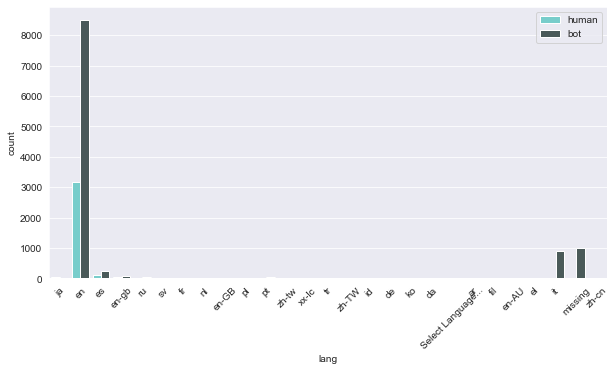

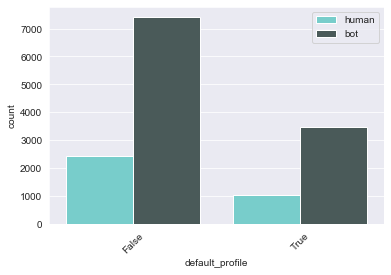

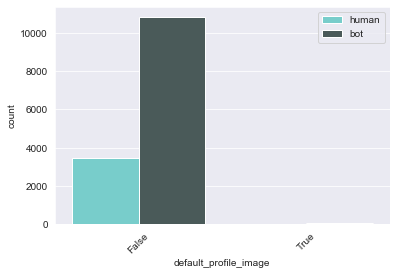

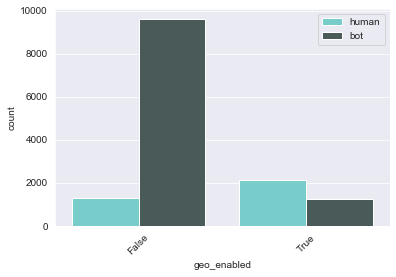

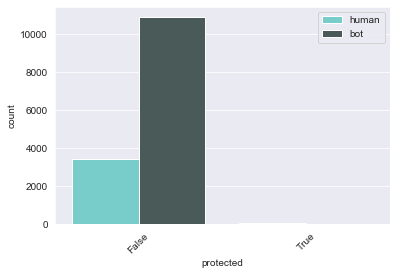

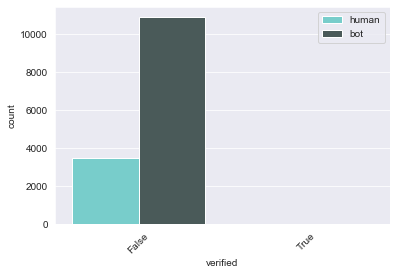

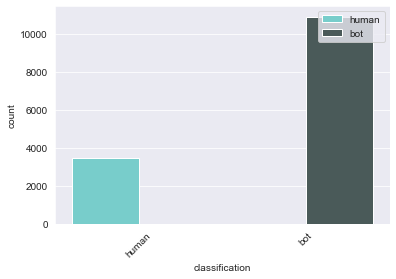

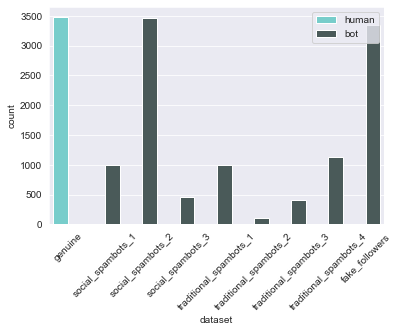

In [364]:
fig, axs = plt.subplots(ncols=1, figsize=(10,5), nrows=1)
sns.set_style("darkgrid")

for var in cat_vars:
    chart = sns.countplot(data=df_accounts, x=var, hue= 'classification')
    plt.xticks(rotation=45);
    chart.legend(loc='upper right');
    plt.show()

In [366]:
quanti_vars

Index(['statuses_count', 'followers_count', 'friends_count',
       'favourites_count', 'listed_count'],
      dtype='object')

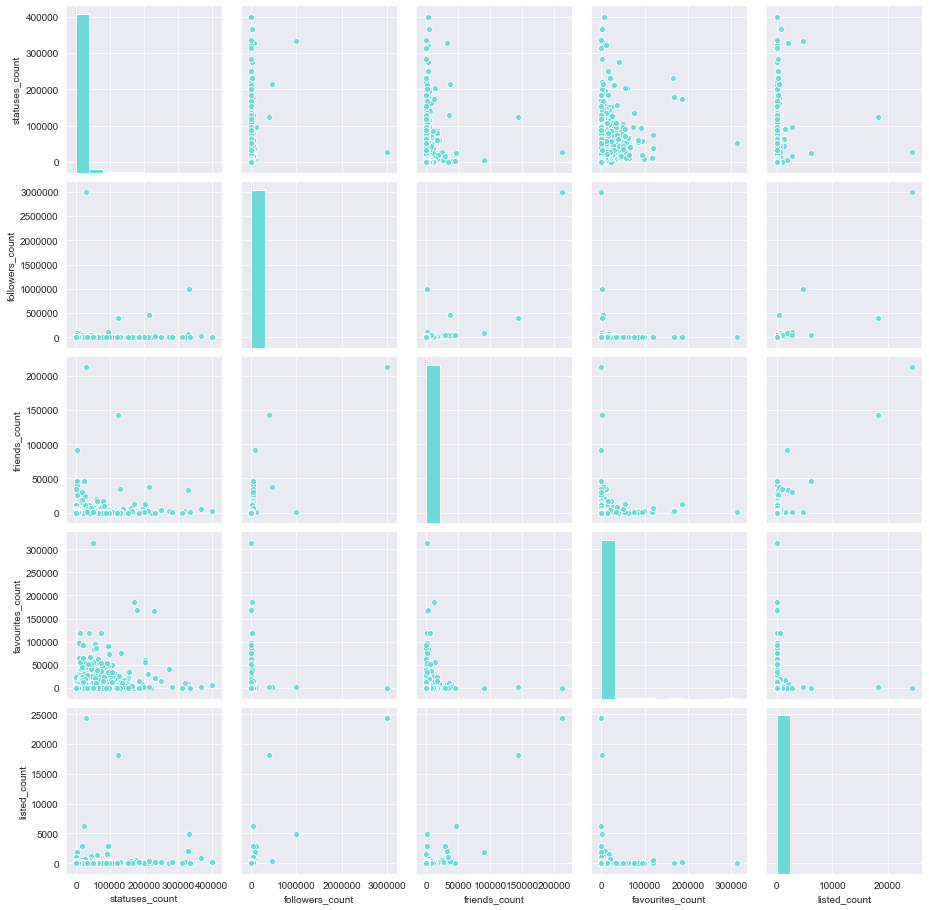

In [367]:
sns.pairplot(data=df_accounts[quanti_vars])

Aparentemente há correlação entre as variáveis "listed_count" e Followers / Friends conts

# Value Information Analysis (VIF)

In [368]:
# Checar multicolinearidade com o VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(dataframe):
    
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = dataframe.columns
    vif["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]

    return(vif)

In [371]:
df_accounts.dtypes

statuses_count            int64
followers_count           int64
friends_count             int64
favourites_count          int64
listed_count              int64
lang                     object
default_profile          object
default_profile_image    object
geo_enabled              object
protected                object
verified                 object
classification           object
dataset                  object
dtype: object

In [370]:
drop_list = ['lang', 'classification', 'dataset']
vif_df = df_accounts.drop(drop_list, axis=1).copy()

In [372]:
bool_columns = vif_df.select_dtypes('object').columns
vif_df[bool_columns] = df_accounts[bool_columns].astype('int32')

In [373]:
calc_vif(dataframe = vif_df).sort_values(by = 'VIF', ascending = False)

,variables,VIF
4,listed_count,5.223309
1,followers_count,3.444088
2,friends_count,3.289549
0,statuses_count,1.318961
3,favourites_count,1.240664
7,geo_enabled,1.170671
5,default_profile,1.053806
9,verified,1.033102
8,protected,1.010585
6,default_profile_image,1.002891


Confirmando que há correlação com a variável Listed Count pois seu VIF é maior que 5

In [374]:
multcolinearity = ['listed_count']

calc_vif(dataframe = vif_df.drop(multcolinearity, axis = 1)).sort_values(by = 'VIF', ascending = False)

,variables,VIF
2,friends_count,2.152890
1,followers_count,2.109569
0,statuses_count,1.318960
3,favourites_count,1.239544
6,geo_enabled,1.170306
4,default_profile,1.044332
8,verified,1.029699
7,protected,1.010493
5,default_profile_image,1.002889
